In [230]:
import math as m
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
sym.init_printing() # makes the output look prettier in sympy 

In [92]:
# review of quadratic eqn

## recall that a quadratic equation is of the form y = ax^2+bx+c = 0, where x is the unknown that we solve for

## Variables as symbols

In [112]:
r,N,K,h = sym.symbols("r N K h")
r

r

## Solving univariate equations

In [113]:
sym.solveset((r*N**2)/K-r*N+h, N)

FiniteSet(K/2 - sqrt(K*r*(K*r - 4*h))/(2*r), K/2 + sqrt(K*r*(K*r - 4*h))/(2*r))

## Solving systems of univariate equations

**We can also solve a system of equations using 'linsolve' or 'nonlinsolve'. Say you have two functions $y = \frac{3}{2}x$ and $y = -\frac{1}{2}x+8$. To solve a system of equations means to find where the functions 'meet' graphically, or where they have the same analytical solution.** 

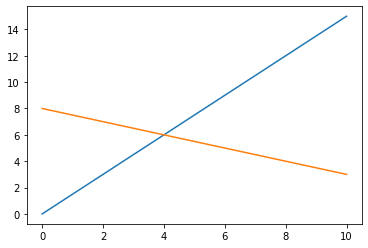

In [114]:
# graphical representation 

x = np.linspace(0,10, 51)
y1 = (3/2)*x
y2 = (-1/2)*x+8
plt.plot(x, y1)
plt.plot(x,y2)
plt.show()

**To analytically solve a system of equations, this would look like cancelling out terms between the two functions. 
For ease, this typically involves carrying all terms to one side, leaving the other side equal to 0. To use 'linsolve' or 'nonlinsolve', the syntax of the functions uses this latter method, where the format of the functions are all on one side, leaving the right side as 0: $y - \frac{3}{2}x = 0$ and $y + \frac{1}{2} - 8 = 0$. In other words, 'linsolve' and 'nonlinsolve' assumes the functions passed into the function equal to 0.**

In [116]:
# analytical solution  

x, y = sym.symbols("x y")
sym.linsolve([y-(3/2)*x, y+(1/2)*x-8],[x,y])

FiniteSet((4.0, 6.0))

**Another example of solving systems of equations, but for nonlinear equations. Let $y = 2x^2-10$ and $y = -4x^2+10$.**

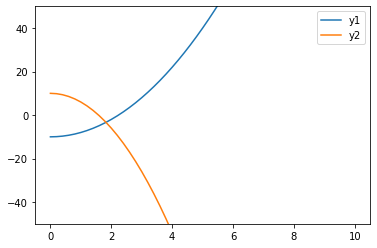

In [176]:
# graphical representation

x = np.linspace(0,10,51)
y1 = 2*x**2-10
y2 = -4*x**2+10
plt.plot(x, y1)
plt.plot(x, y2)
plt.ylim(-50,50)
plt.legend(["y1", "y2"])
plt.show()

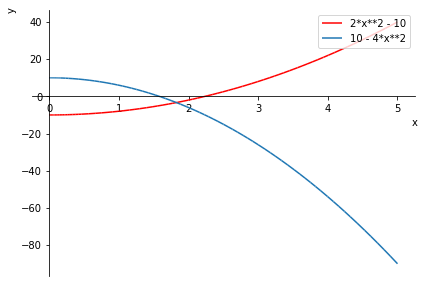

In [43]:
# using sym.plot function as an alternative
## doesn't require creating a range for x, but also less flexible in plot manipulation

x = sym.symbols("x")
eq1 = 2*x**2-10
eq2 = -4*x**2+10

p = sym.plot(eq1, eq2, (x, 0, 5), xlabel="x", ylabel="y", show = False, legend = True)
p[0].line_color='r'
p.show() # needed since the argument in sym.plot says false

In [83]:
# analytical solution

x, y = sym.symbols("x y")
sym.nonlinsolve([y-2*x**2+10, y+4*x**2-10],[x,y])

FiniteSet((-sqrt(30)/3, -10/3), (sqrt(30)/3, -10/3))

In [87]:
# extracting parts of the solution

sym.nonlinsolve([y-2*x**2+10, y+4*x**2-10],[x,y]).args[0]#[0]

(-sqrt(30)/3, -10/3)

## Calculating differentials and integrals

We can use sym.diff() and sym.integrate() for this.

Let $y = x^2 + 3 - \cos{x}$. 

**Differentiation**

In [148]:
# sympy for calculating differentials

x = sym.symbols("x")
sym.diff(x**2 + 3 - sym.cos(x),x)

2*x + sin(x)

In [78]:
# more syntax

y = sym.symbols("y", cls=sym.Function)
x = sym.symbols("x")
dydx = y(x).diff(x) # differentiating the equation y with respect to x
eqn = sym.Eq(dydx, sym.diff(x**2+3-sym.cos(x),x))
eqn

Eq(Derivative(y(x), x), 2*x + sin(x))

**Integration**

In [149]:
# sympy for calculating indefinite integrals

x = sym.symbols("x")
sym.integrate(2*x + sym.sin(x))

x**2 - cos(x)

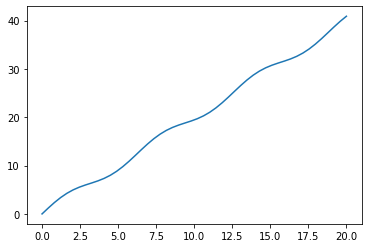

In [150]:
xs = np.linspace(0,20,50)
y = [2*x + m.sin(x) for x in xs]
plt.plot(xs, y)
plt.show()

In [131]:
# evaluation for a definite integral

x = sym.symbols("x")
sym.integrate(2*x + sym.sin(x),(x,0, 20)).evalf(10)

400.5919179

## Using 'dsolve' to solve ODEs

Lets use our favorite bacterial growth rate in rich media as an example:
  
## $\frac{dN(t)}{dt}=kN(t)$  

where $t$ is time, k is some constant specific for this E.coli strain and growth conditions, $N(t)$ is number of E. coli at time $t$.  

In [24]:
# analytical solution

N = sym.symbols("N", cls=sym.Function) # because both sides of a differential contain the function N(t), we need
# to tell sympy that N is a function, and not just an independent variable
t, k = sym.symbols("t, k")

Growth_solution = sym.dsolve(sym.diff(N(t), t) - k * N(t), N(t)) # we also need to indicate that N is a function of t
Growth_solution

Eq(N(t), C1*exp(k*t))

In [30]:
# using ics, given in the form of {f(x0): x1}

N = sym.symbols("N", cls=sym.Function)
t, k = sym.symbols("t, k")

Growth_solution = sym.dsolve(sym.diff(N(t), t) - k * N(t), N(t), ics={N(0): N0})
Growth_solution

Eq(N(t), N0*exp(k*t))

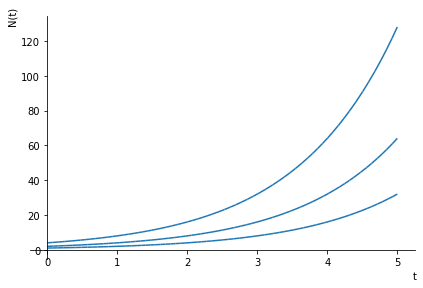

In [40]:
# plotting the solution

sym.plot(
    Growth_solution.rhs.subs({N0: 1, k: sym.ln(2)}), # rhs - right hand side, indicates that the rhs of the solution gets plotted
    Growth_solution.rhs.subs({N0: 2, k: sym.ln(2)}), # subs - substitutes variables with values
    Growth_solution.rhs.subs({N0: 4, k: sym.ln(2)}),
    (t, 0, 5),
    xlabel="t",
    ylabel="N(t)",
); # semicolon is not needed, does the same thing as plt.show() - removes python memory allocation output


**Notice this graph looks the same to the numerical solution (below) - so the numerical method of integrating over discrete time intervals did indeed approximate the true analytical solution.**

In [88]:
def expFun(t,N):
    dNdt = k*N
    return dNdt

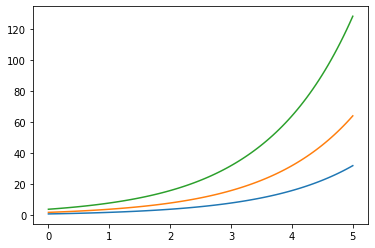

In [89]:
# plotting the numerical solution

k=sym.ln(2)
sol1 = solve_ivp(fun, t_span=[0,5], y0=[1], t_eval = np.linspace(0,5,100))
sol2 = solve_ivp(fun, t_span=[0,5], y0=[2], t_eval = np.linspace(0,5,100))
sol3 = solve_ivp(fun, t_span=[0,5], y0=[4], t_eval = np.linspace(0,5,100))
plt.plot(sol1.t, sol1.y[0], sol2.t, sol2.y[0], sol3.t, sol3.y[0])
plt.show()

**Another example - our logistic equation from the last assignment. Let** 
### $\frac{dN}{dt} = rN(1-\frac{N}{K})$

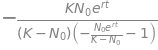

In [148]:
# analytical solution

N = sym.symbols("N", cls=sym.Function)
t, r, K, N0 = sym.symbols("t, r, K, N0")

logisticSol = sym.dsolve(sym.diff(N(t), t) - r * N(t)*(1-N(t)/K), N(t), ics={N(0): N0})
logisticSol


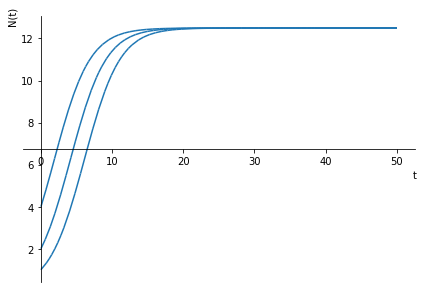

In [51]:
# plotting the solution

sym.plot(
    logisticSol.rhs.subs({N0: 1, K: 12.5, r: 0.4}),
    logisticSol.rhs.subs({N0: 2, K: 12.5, r:0.4}),
    logisticSol.rhs.subs({N0: 4, K: 12.5, r:0.4}),
    (t, 0, 50),
    xlabel="t",
    ylabel="N(t)",
);

## Solving systems of ODEs

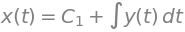

In [231]:
x, y = sym.symbols("x y", cls=sym.Function)
t, x0, y0 = sym.symbols("t x0 y0")
eqx = sym.diff(x(t),t)-y(t)
solx = sym.dsolve(eqx, x(t))
solx

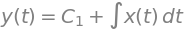

In [232]:
eqy = sym.diff(y(t),t)-x(t)
soly = sym.dsolve(eqy, y(t))
soly

In [233]:
sol = sym.dsolve([eqx,eqy],[x(t),y(t)])
sol

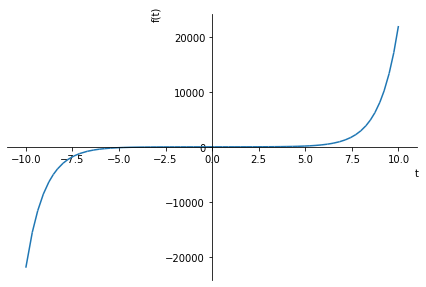

In [234]:
sym.plot(-sym.exp(-t)+sym.exp(t));

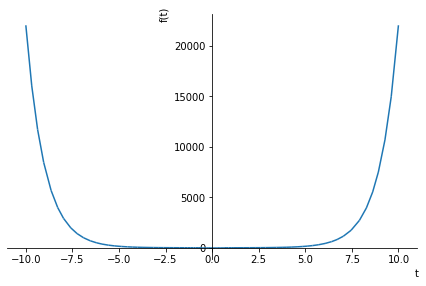

In [235]:
sym.plot(sym.exp(-t)+sym.exp(t));

**Unfortunately not all systems of analytical solutions.

**Let's solve a system of ODEs using numerical approximations through solve_ivp() again. Let $\frac{dHare}{dt}=b \cdot Hare - k_1 \cdot Lynx \cdot Hare$  and $\frac{dLynx}{dt}=k_2 \cdot Lynx \cdot Hare - d \cdot Lynx$.**

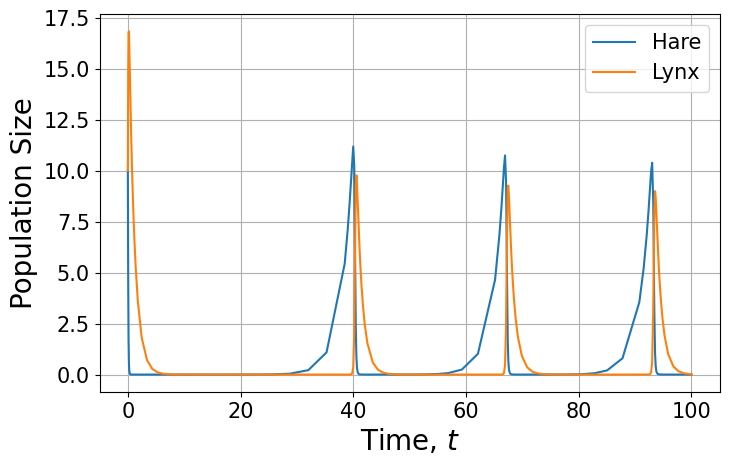

In [246]:
b = 0.5
k1 = 1
k2 = 1
d = 1

def LotkaVolterra(t, y):
    Hare, Lynx = y
    dHare_dt = (b - k1 * Lynx) * Hare
    dLynx_dt = (k2 * Hare - d) * Lynx
    return [dHare_dt, dLynx_dt]


initial_condition = [10, 10] # passing in two conditions for both differentials
tspan = [0, 100]
soln = solve_ivp( #numerical solution
    LotkaVolterra, 
    tspan, 
    initial_condition) 

plt.figure(figsize=(8,5), dpi=100)
plt.plot(soln.t, soln.y[0],label="Hare")
plt.plot(soln.t, soln.y[1],label="Lynx")
plt.xlabel("Time, $t$", fontsize=20)
plt.ylabel("Population Size", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=15);

In [241]:
Hare, Lynx, b, k1, k2, d = sym.symbols("Hare, Lynx, b, k1, k2, d")

dHare_dt = (b - k1 * Lynx) * Hare
dLynx_dt = (k2 * Hare - d) * Lynx

sym.nonlinsolve([dHare_dt,dLynx_dt],[Hare, Lynx])

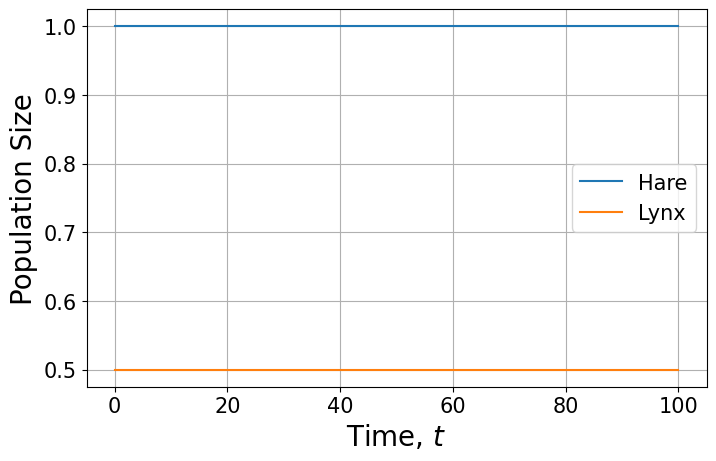

In [245]:
b = 0.5
k1 = 1
k2 = 1
d = 1

def LotkaVolterra(t, y):
    Hare, Lynx = y
    dHare_dt = (b - k1 * Lynx) * Hare
    dLynx_dt = (k2 * Hare - d) * Lynx
    return [dHare_dt, dLynx_dt]


initial_condition = [d/k2, b/k1] # passing in two conditions for both differentials
tspan = [0, 100]
soln = solve_ivp(
    LotkaVolterra, 
    tspan, 
    initial_condition) 

plt.figure(figsize=(8,5), dpi=100)
plt.plot(soln.t, soln.y[0],label="Hare")
plt.plot(soln.t, soln.y[1],label="Lynx")
plt.xlabel("Time, $t$", fontsize=20)
plt.ylabel("Population Size", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=15);